# RESEARCH PROJECT ON EMPLOYEE ATTRITION DATASET

In [18]:
#  importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [19]:
# Importing the Dataset
data = pd.read_csv("/Users/ananya/Downloads/Employee-Attrition_Dataset.csv")

In [20]:
data.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

## DATA CLEANING 

In [21]:
# check for null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

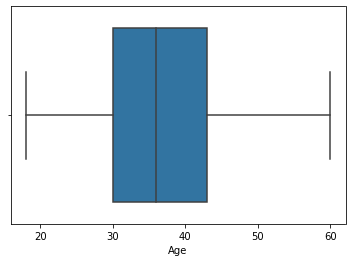

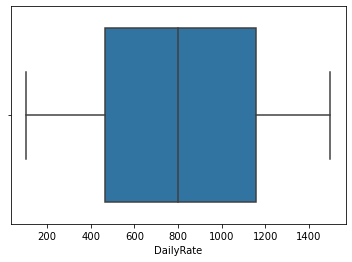

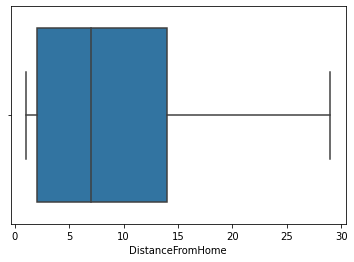

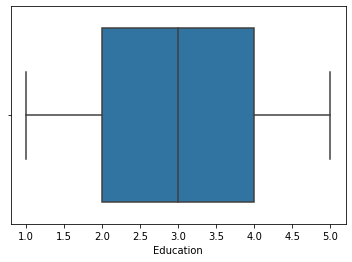

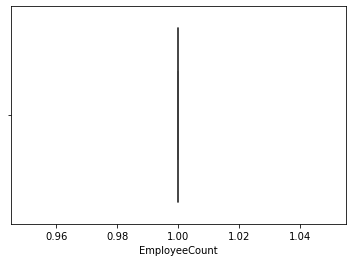

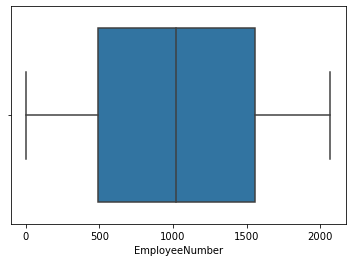

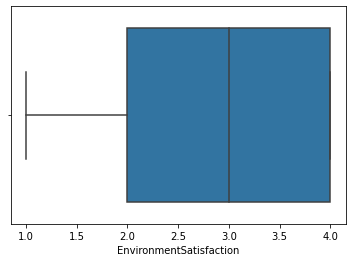

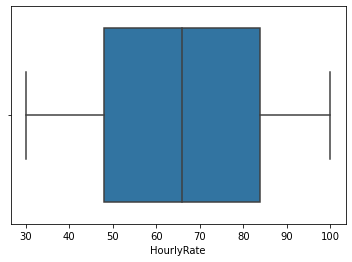

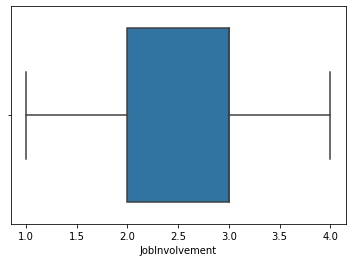

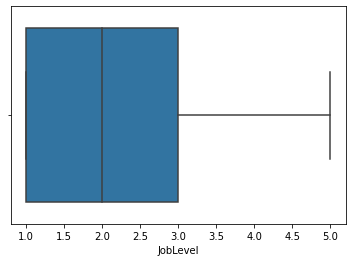

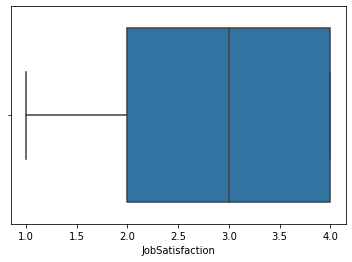

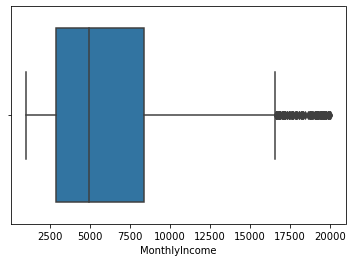

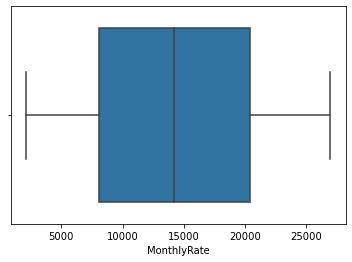

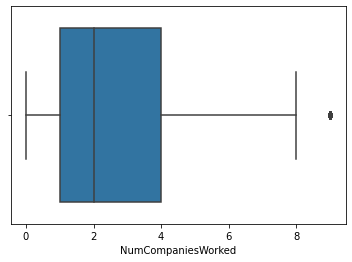

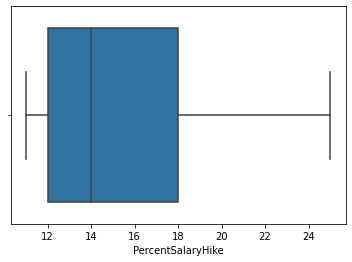

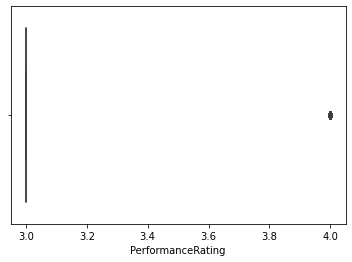

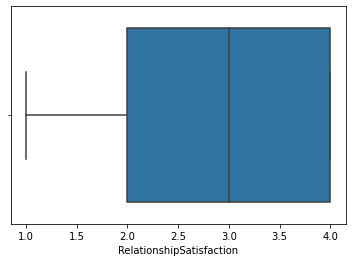

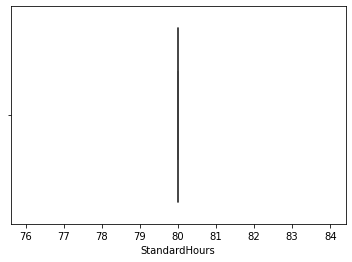

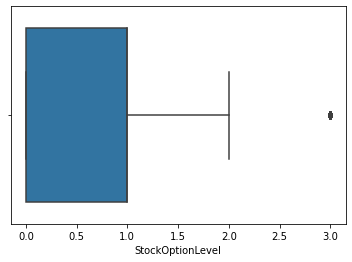

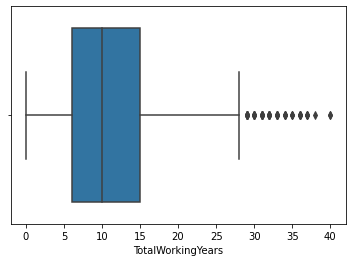

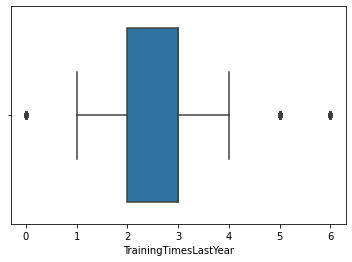

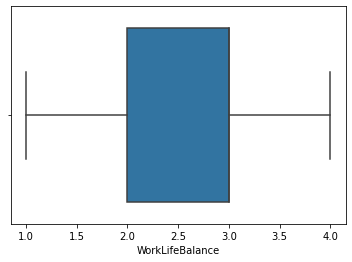

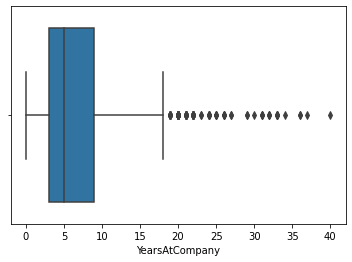

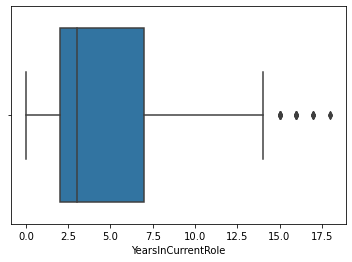

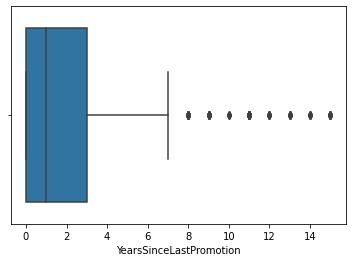

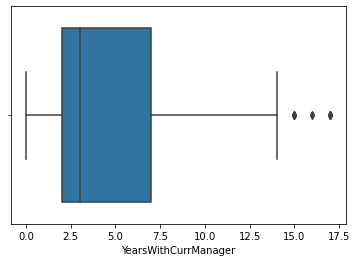

In [22]:
# check for outliers
for col in data.columns:
    if data[col].dtype !=object:
        x = data[col]
        sb.boxplot(x=x)
        plt.show()


In [23]:
#Handle outliers 

In [24]:
#droping some of the unwanted columns
data=data.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'], axis=1)


In [25]:
data = data.drop(['PerformanceRating'],axis=1)

## DATA ANALYSIS AND PREPROCESSING 

In [26]:
data['Attrition'].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

/Users/ananya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

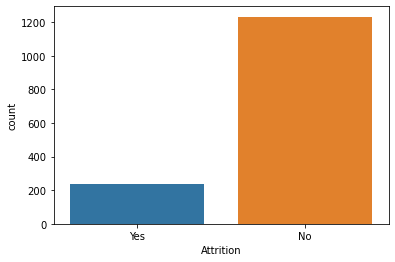

In [27]:
sb.countplot(data['Attrition'], label = 'count')

In [28]:
# Analysing different values in object data types
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [29]:
# as the model cannot use object data types we will use label encoding to convert object data type to int data type
data.loc[:,'Attrition'] = encode.fit_transform(data.loc[:, 'Attrition'].values)
data.loc[:,'MaritalStatus'] = encode.fit_transform(data.loc[:, 'MaritalStatus'].values)
data.loc[:,'BusinessTravel'] = encode.fit_transform(data.loc[:, 'BusinessTravel'].values)
data.loc[:,'Department'] = encode.fit_transform(data.loc[:, 'Department'].values)
data.loc[:,'EducationField'] = encode.fit_transform(data.loc[:, 'EducationField'].values)
data.loc[:,'Gender'] = encode.fit_transform(data.loc[:, 'Gender'].values)
data.loc[:,'JobRole'] = encode.fit_transform(data.loc[:, 'JobRole'].values)
data.loc[:,'OverTime'] = encode.fit_transform(data.loc[:, 'OverTime'].values)

In [30]:
data.head(10)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   
5   32          0               1       1005           1                 2   
6   59          0               2       1324           1                 3   
7   30          0               2       1358           1                24   
8   38          0               1        216           1                23   
9   36          0               2       1299           1                27   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   
5          2               1                        4       1  ...   
6          3               3                        3       0  ...   
7          1               1                        4       1  ...   
8          3               1                        4       1  ...   
9          3               3                        3       1  ...   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0                 11                         1                 0   
1                 23                         4                 1   
2                 15                         2                 0   
3                 11                         3                 0   
4                 12                         4                 1   
5                 13                         3                 0   
6                 20                         1                 3   
7                 22                         2                 1   
8                 21                         2                 0   
9                 13                         2                 2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   
5                  8                      2                2               7   
6                 12                      3                2               1   
7                  1                      2                3               1   
8                 10                      2                3               9   
9                 17                      3                2               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  
5                   7                        3                     6  
6                   0                        0                     0  
7                   0                        0                     0  
8                   7                        1                     8  
9                   7            


### studying correlation between features of the dataset using correlation heatmap 

<AxesSubplot:>

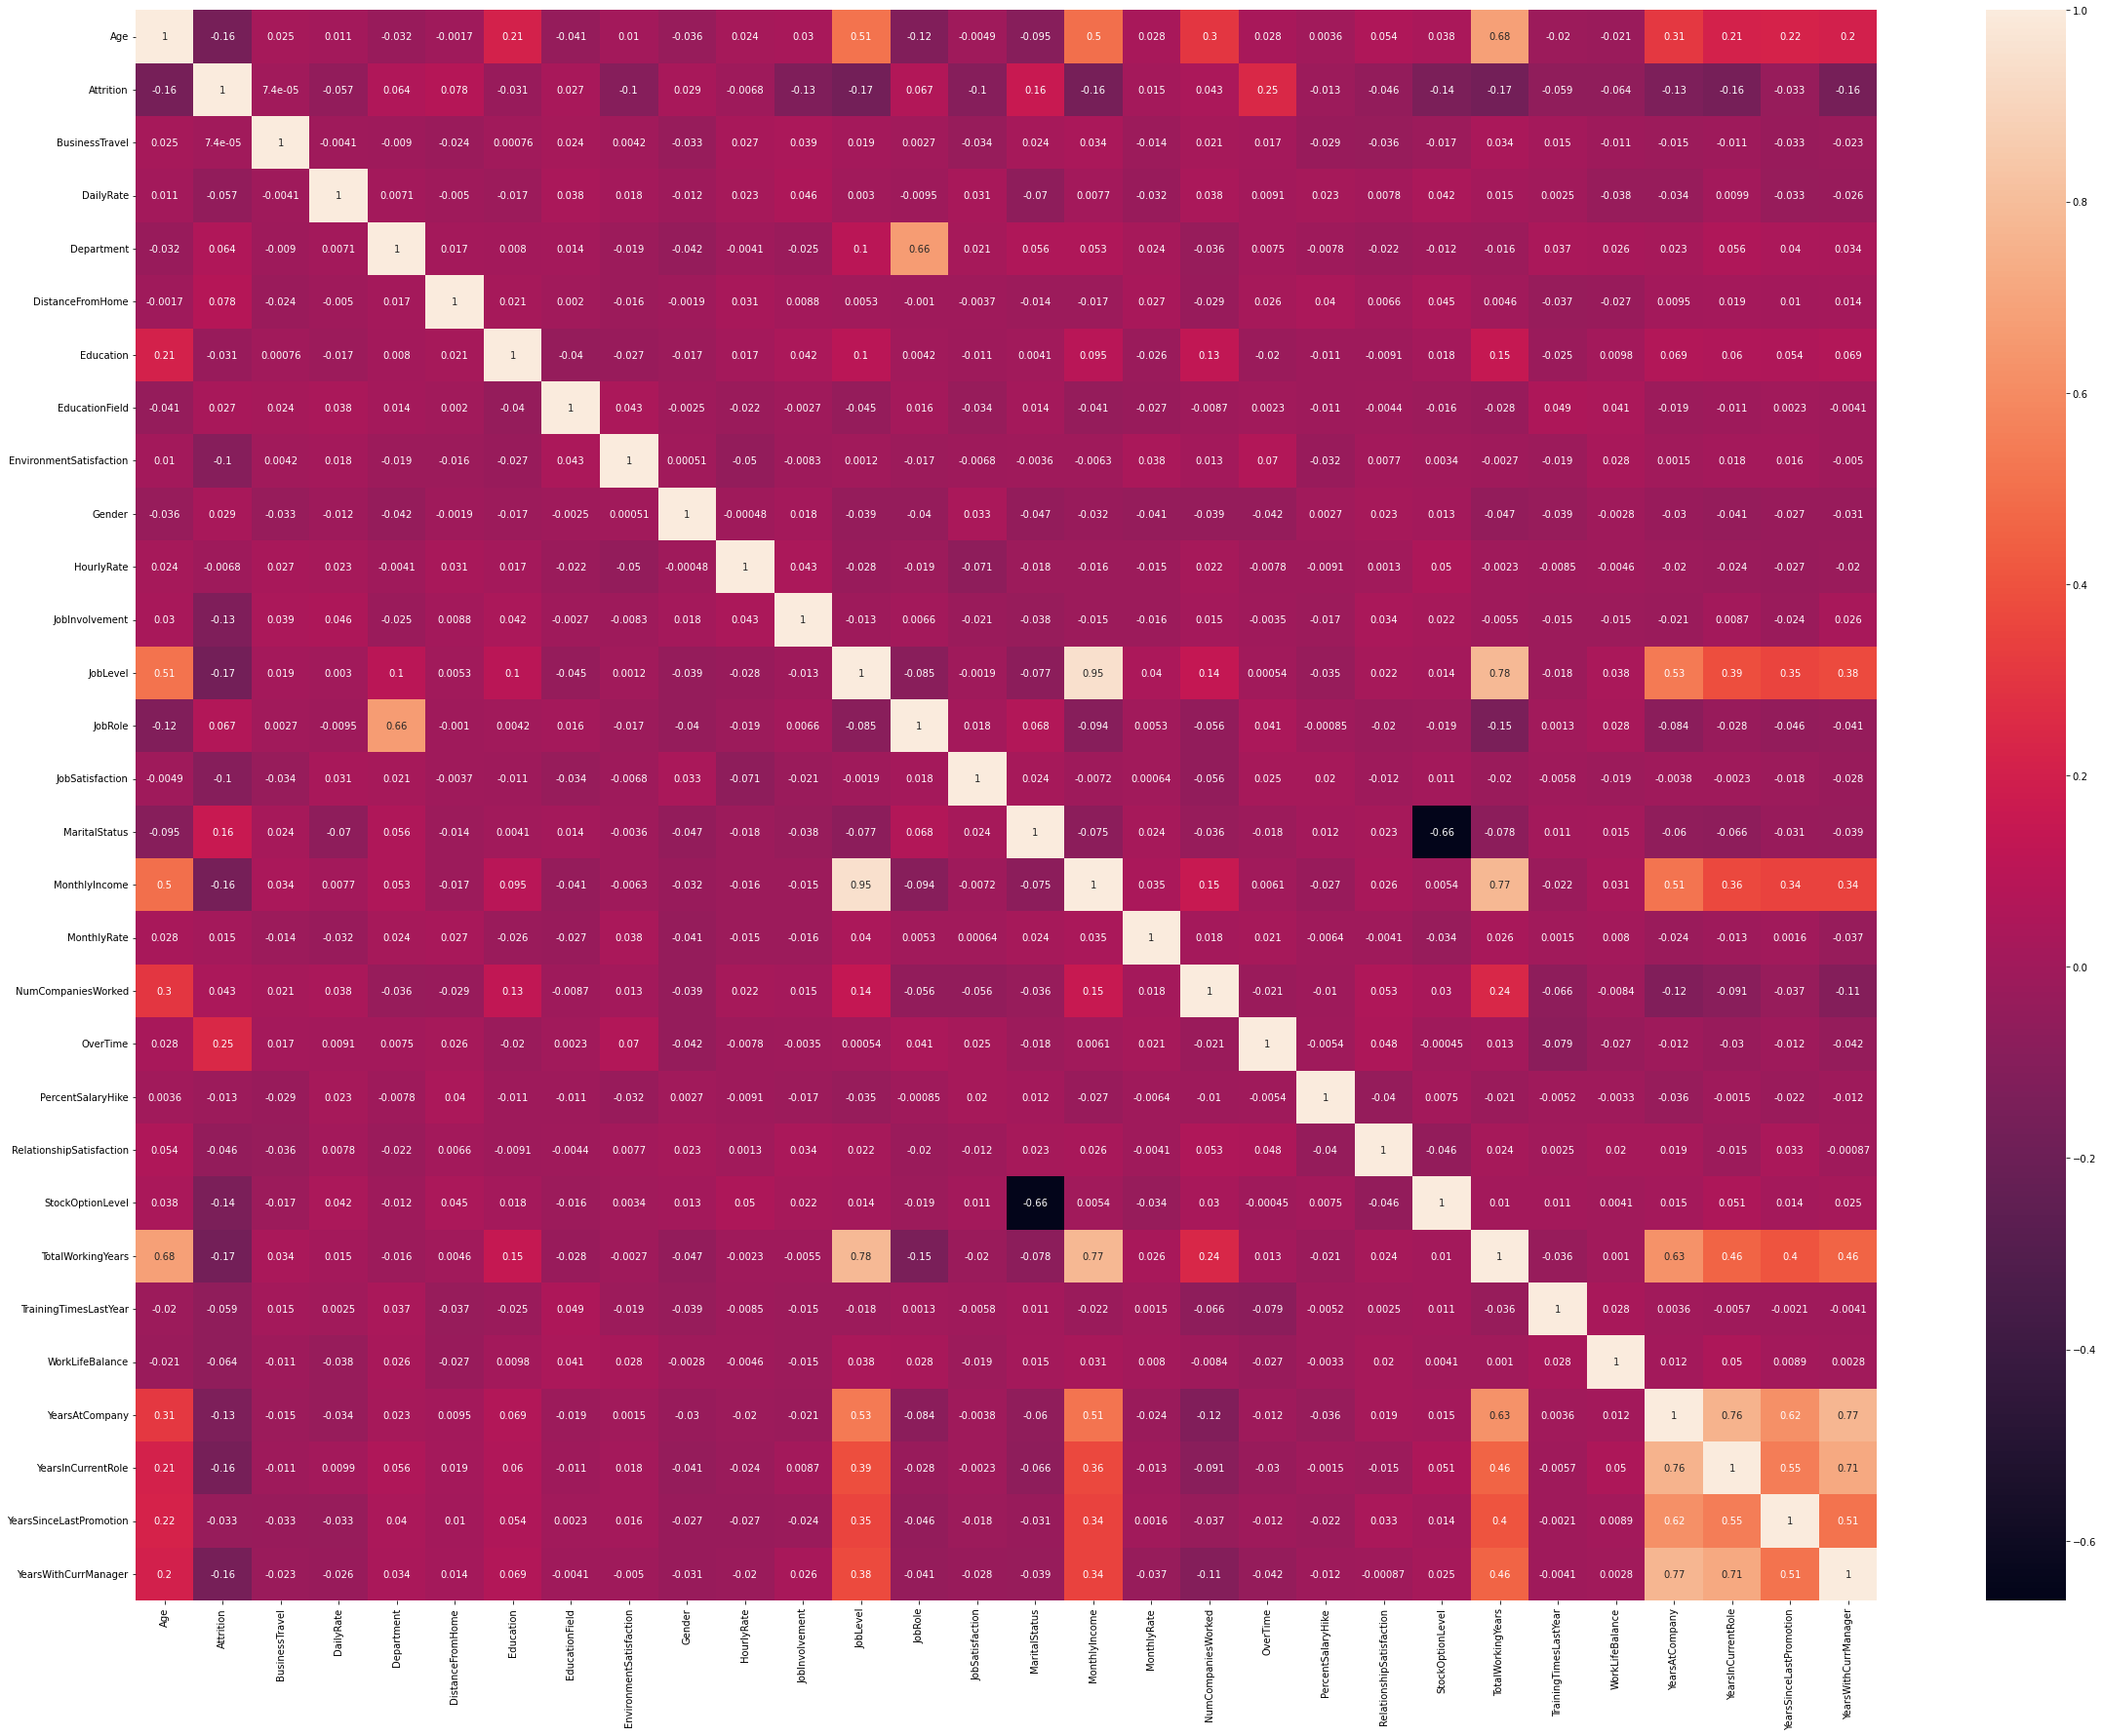

In [31]:
#
plt.figure(figsize = (40,30))
sb.heatmap(data.corr(),annot = True) 

## PREDICTION USING ML MODELS

### For this dataset we will use 4 models - LogisticRegression, Deciidon Tree, Random Forest and Naive Bayes 

STEP1 : Split The dataset into independent and dependent variables and train and test variables

In [32]:
x = data
x = x.drop("Attrition",axis=1)
y = data.Attrition


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.25, random_state = 10)

In [34]:
from sklearn.metrics import accuracy_score

#  LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 10)
log.fit(x_train, Y_train)


#  DECISION TREE
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 10, criterion = "entropy")
tree.fit(x_train, Y_train)


#  RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = 10)
forest.fit(x_train, Y_train)


#  NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, Y_train)

print('Logistic regression: ', log.score(x_train, Y_train))
print('Accuracy', accuracy_score(Y_test, log.predict(x_test)))

print('Decision tree: ', tree.score(x_train, Y_train))
print('Accuracy', accuracy_score(Y_test, tree.predict(x_test)))

print('Random forest: ', forest.score(x_train, Y_train))
print('Accuracy', accuracy_score(Y_test, forest.predict(x_test)))

print('Random forest: ', gnb.score(x_train, Y_train))
print('Accuracy', accuracy_score(Y_test, gnb.predict(x_test)))


Logistic regression:  0.8466424682395645
Accuracy 0.8179347826086957
Decision tree:  1.0
Accuracy 0.8070652173913043
Random forest:  0.9827586206896551
Accuracy 0.8315217391304348
Random forest:  0.822141560798548
Accuracy 0.845108695652174


/Users/ananya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Here we can see that naive bayes model has the highest accuracy

### Plotting the Confusion Matrix for All the Models

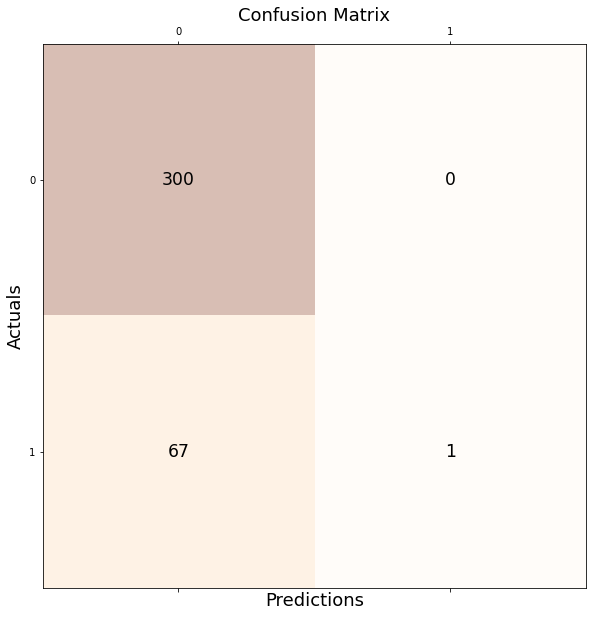

Precision: 1.000
Recall: 0.015
Accuracy: 0.818
F1 Score: 0.029


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Logistic Regression Model
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=log.predict(x_test))
 
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()  

print('Precision: %.3f' % precision_score(Y_test, log.predict(x_test)))
print('Recall: %.3f' % recall_score(Y_test, log.predict(x_test)))
print('Accuracy: %.3f' % accuracy_score(Y_test, log.predict(x_test)))
print('F1 Score: %.3f' % f1_score(Y_test, log.predict(x_test)))


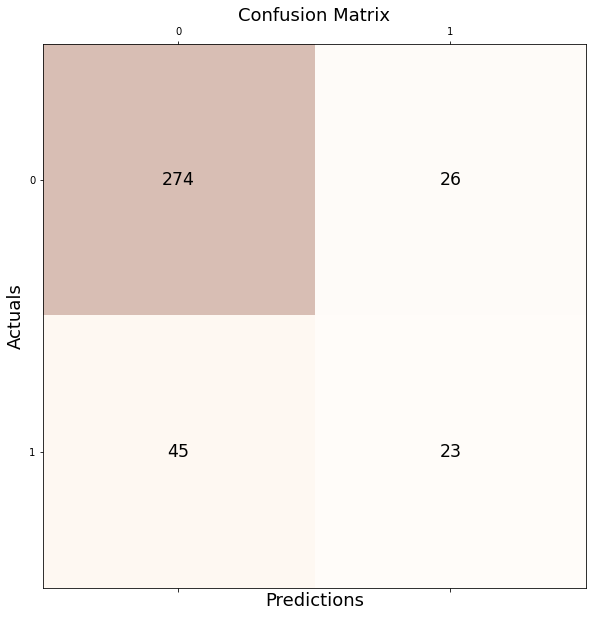

Precision: 0.469
Recall: 0.338
Accuracy: 0.807
F1 Score: 0.393


In [41]:
# Decision Tree Model
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=tree.predict(x_test))
 
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()  

print('Precision: %.3f' % precision_score(Y_test, tree.predict(x_test)))
print('Recall: %.3f' % recall_score(Y_test, tree.predict(x_test)))
print('Accuracy: %.3f' % accuracy_score(Y_test, tree.predict(x_test)))
print('F1 Score: %.3f' % f1_score(Y_test, tree.predict(x_test)))

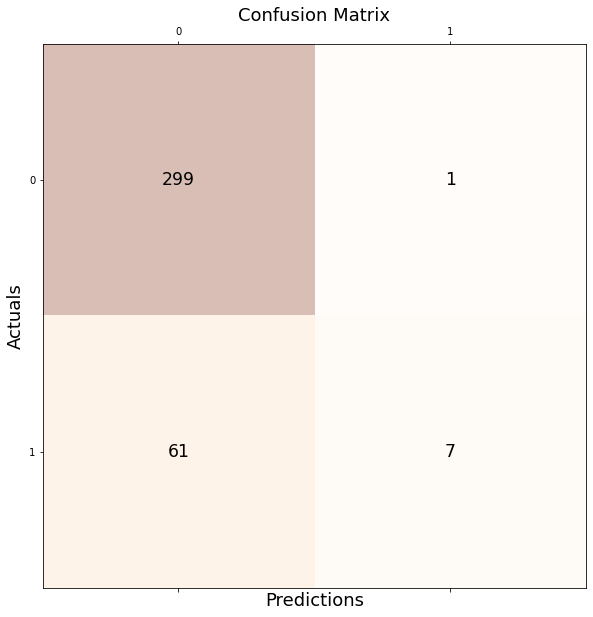

Precision: 0.875
Recall: 0.103
Accuracy: 0.832
F1 Score: 0.184


In [42]:
# Logistic Regression Model
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=forest.predict(x_test))
 
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()  

print('Precision: %.3f' % precision_score(Y_test, forest.predict(x_test)))
print('Recall: %.3f' % recall_score(Y_test, forest.predict(x_test)))
print('Accuracy: %.3f' % accuracy_score(Y_test, forest.predict(x_test)))
print('F1 Score: %.3f' % f1_score(Y_test, forest.predict(x_test)))

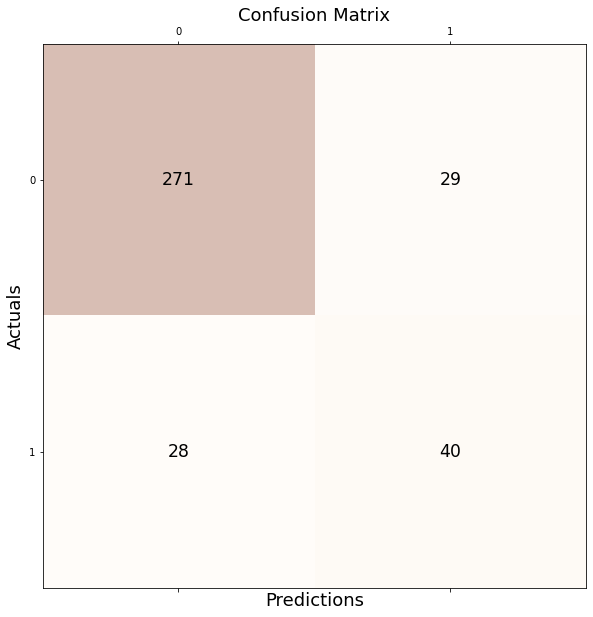

Precision: 0.580
Recall: 0.588
Accuracy: 0.845
F1 Score: 0.584


In [43]:
# Logistic Regression Model
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=gnb.predict(x_test))
 
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()  

print('Precision: %.3f' % precision_score(Y_test, gnb.predict(x_test)))
print('Recall: %.3f' % recall_score(Y_test, gnb.predict(x_test)))
print('Accuracy: %.3f' % accuracy_score(Y_test, gnb.predict(x_test)))
print('F1 Score: %.3f' % f1_score(Y_test, gnb.predict(x_test)))

### PLOTTING A GRAPH FOR THE ACCURACY SCORES

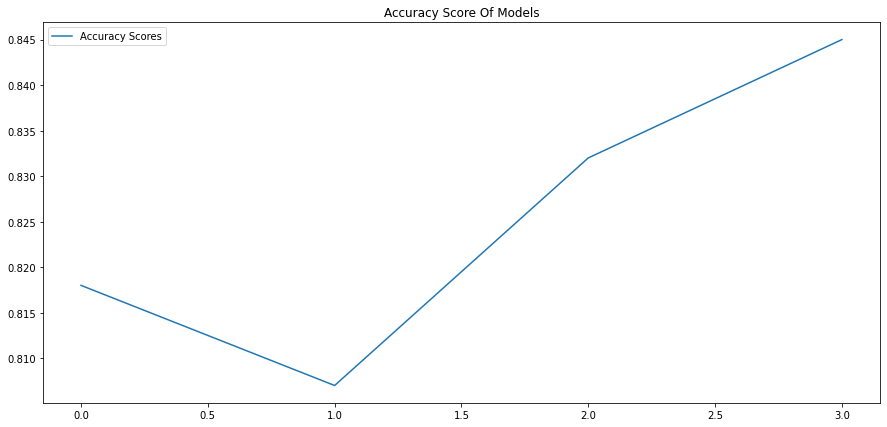

In [46]:
plt.figure(figsize = (15,7))
Accuracy_Test_data= [0.818,0.807,0.832,0.845]
plt.plot(Accuracy_Test_data, label ='Accuracy Scores')
plt.title('Accuracy Score Of Models')
plt.legend()
plt.show()

### PLOTTING A GRAPH FOR THE F-1 SCORES

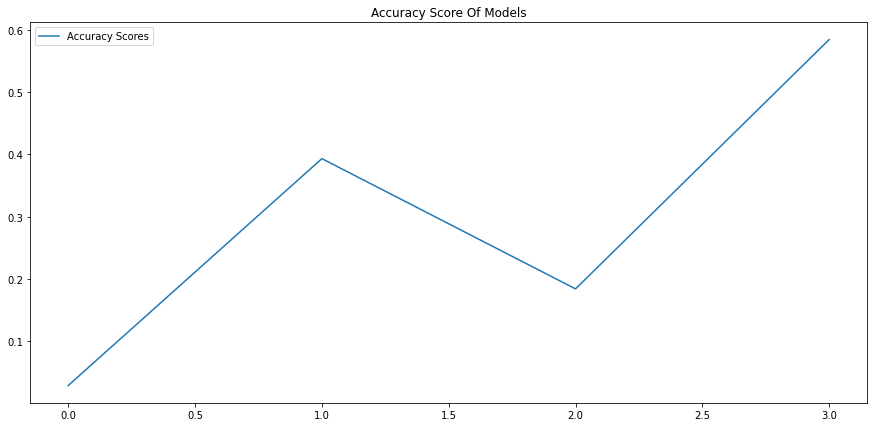

In [47]:
plt.figure(figsize = (15,7))
Accuracy_Test_data= [0.029, 0.393, 0.184, 0.584]
plt.plot(Accuracy_Test_data, label ='Accuracy Scores')
plt.title('Accuracy Score Of Models')
plt.legend()
plt.show()